In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import os

In [2]:
lpc_lengths = np.arange(1, 51)


### Create one dataframe for each bot in dev

In [4]:
X_dev_bonafide_list = []
X_dev_spoof_list = []


dev_bot_systems = ['A01', 'A02', 'A03', 'A04', 'A05', 'A06']

dev_bot_names = {'A01':'WaveNet*', 'A02':'WORLD' ,
                          'A03':'WORLD', 'A04':'Waveform concat.', 
                          'A05':'WORLD', 'A06':'Spectral filtering + OLA'}



dest_folder = '/nas/home/cborrelli/bot_speech/features/lpc/bot'

for l in lpc_lengths:
    dev_features = pd.read_pickle('/nas/home/cborrelli/bot_speech/features/lpc/dev_LPC_' + str(l) +'.pkl')
    #dev_features.drop('coeff', axis=1, inplace=True)
    #dev_features.dropna(inplace=True)
    
    dev_spoof_features= dev_features[dev_features['label']=='spoof']

    for b in dev_bot_systems:
        
        dev_bot_spoof_features = dev_spoof_features[dev_features['system_id'] == b]
        
        dest_filename = 'dev_LPC_'+ str(l)+'_bot_'+str(b)+'.pkl'
        dev_bot_spoof_features.to_pickle(os.path.join(dest_folder, dest_filename))



### Extract train features for testing

In [5]:
X_train_bonafide_list = []
X_train_spoof_list = []
max_lpc_order = 50
lpc_lengths = np.arange(1, max_lpc_order + 1)


for l in lpc_lengths:
    train_features = pd.read_pickle('/nas/home/cborrelli/bot_speech/features/lpc/train_LPC_' + str(l) +'.pkl')
    #train_features.drop('coeff', axis=1, inplace=True)
    train_features.dropna(inplace=True)
    
    train_bonafide_features = train_features[train_features['label']=='bonafide']
    train_spoof_features = train_features[train_features['label']=='spoof']
    
    if l==1:
        train_spoof_features = train_features[train_features['label']=='spoof'].sample(
            n=train_bonafide_features.shape[0])
        selected_files = train_spoof_features['audio_filename']
    else:
        train_spoof_features = train_spoof_features[train_spoof_features['audio_filename'].isin(selected_files)]
    
    X_train_bonafide_list.append(np.array(train_bonafide_features['lpc_res_mean']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['lpc_res_max']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['lpc_res_min']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['lpc_res_var']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['lpc_gain_max']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['lpc_gain_min']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['lpc_gain_mean']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['lpc_gain_var']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['ltp_res_mean']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['ltp_res_max']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['ltp_res_min']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['ltp_res_var']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['ltp_gain_max']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['ltp_gain_min']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['ltp_gain_mean']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['ltp_gain_var']).reshape((-1, 1)))


    X_train_spoof_list.append(np.array(train_spoof_features['lpc_res_mean']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['lpc_res_max']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['lpc_res_min']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['lpc_res_var']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['lpc_gain_max']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['lpc_gain_min']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['lpc_gain_mean']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['lpc_gain_var']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['ltp_res_mean']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['ltp_res_max']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['ltp_res_min']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['ltp_res_var']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['ltp_gain_max']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['ltp_gain_min']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['ltp_gain_mean']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['ltp_gain_var']).reshape((-1, 1)))


X_train_bonafide = np.concatenate(X_train_bonafide_list, axis=1)
X_train_spoof = np.concatenate(X_train_spoof_list, axis=1)
X_train = np.concatenate((X_train_bonafide, X_train_spoof), axis=0)

y_train_bonafide = np.zeros((X_train_bonafide.shape[0],))
y_train_spoof = np.ones((X_train_spoof.shape[0],))

y_train = np.concatenate((y_train_bonafide, y_train_spoof), axis=0)

### Extract dev features

In [20]:
X_dev_bonafide_list = []
X_dev_spoof_list = []

lpc_lengths = np.arange(1, 51)

dev_bot_features = []

for b in dev_bot_systems:
    X_dev_spoof_list = []
    selected_files = []
    for l in lpc_lengths:
        dev_features = pd.read_pickle('/nas/home/cborrelli/bot_speech/features/lpc/bot/dev_LPC_' + 
                                      str(l) +'_bot_'+ str(b) +'.pkl')

        #dev_features.drop('coeff', axis=1, inplace=True)

        dev_features.dropna(inplace=True)

        dev_bonafide_features = dev_features[dev_features['label']=='bonafide']
        dev_spoof_features = dev_features[dev_features['label']=='spoof']
        
        #if l==1:
        #    dev_spoof_features = dev_features[dev_features['label']=='spoof'].sample(
        #        n=dev_bonafide_features.shape[0])
        #    selected_files = dev_spoof_features['audio_filename']
        #else:
        #    dev_spoof_features = dev_spoof_features[dev_spoof_features['audio_filename'].isin(selected_files)]
    
        
        X_dev_spoof_list.append(np.array(dev_spoof_features['lpc_res_mean']).reshape((-1, 1)))
        X_dev_spoof_list.append(np.array(dev_spoof_features['lpc_res_max']).reshape((-1, 1)))
        X_dev_spoof_list.append(np.array(dev_spoof_features['lpc_res_min']).reshape((-1, 1)))
        X_dev_spoof_list.append(np.array(dev_spoof_features['lpc_res_var']).reshape((-1, 1)))
        X_dev_spoof_list.append(np.array(dev_spoof_features['lpc_gain_max']).reshape((-1, 1)))
        X_dev_spoof_list.append(np.array(dev_spoof_features['lpc_gain_min']).reshape((-1, 1)))
        X_dev_spoof_list.append(np.array(dev_spoof_features['lpc_gain_mean']).reshape((-1, 1)))
        X_dev_spoof_list.append(np.array(dev_spoof_features['lpc_gain_var']).reshape((-1, 1)))
        X_dev_spoof_list.append(np.array(dev_spoof_features['ltp_res_mean']).reshape((-1, 1)))
        X_dev_spoof_list.append(np.array(dev_spoof_features['ltp_res_max']).reshape((-1, 1)))
        X_dev_spoof_list.append(np.array(dev_spoof_features['ltp_res_min']).reshape((-1, 1)))
        X_dev_spoof_list.append(np.array(dev_spoof_features['ltp_res_var']).reshape((-1, 1)))
        X_dev_spoof_list.append(np.array(dev_spoof_features['ltp_gain_max']).reshape((-1, 1)))
        X_dev_spoof_list.append(np.array(dev_spoof_features['ltp_gain_min']).reshape((-1, 1)))
        X_dev_spoof_list.append(np.array(dev_spoof_features['ltp_gain_mean']).reshape((-1, 1)))
        X_dev_spoof_list.append(np.array(dev_spoof_features['ltp_gain_var']).reshape((-1, 1)))
    X_dev_spoof = np.concatenate(X_dev_spoof_list, axis=1)
    y_dev_spoof = np.ones((X_dev_spoof.shape[0],))

    dev_bot_features.append({'bot': b, 'X_dev_spoof': X_dev_spoof, 'y_dev_spoof': y_dev_spoof})

    


In [35]:
X_dev_bonafide_list = []
for l in lpc_lengths:
    dev_features = pd.read_pickle('/nas/home/cborrelli/bot_speech/features/lpc/dev_LPC_' + str(l) +'.pkl')
    #dev_features.drop('coeff', axis=1, inplace=True)
    dev_features.dropna(inplace=True)  
    
    dev_bonafide_features = dev_features[dev_features['label']=='bonafide']
    
    
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['lpc_res_mean']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['lpc_res_max']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['lpc_res_min']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['lpc_res_var']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['lpc_gain_max']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['lpc_gain_min']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['lpc_gain_mean']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['lpc_gain_var']).reshape((-1, 1)))
    
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['ltp_res_mean']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['ltp_res_max']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['ltp_res_min']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['ltp_res_var']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['ltp_gain_max']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['ltp_gain_min']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['ltp_gain_mean']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['ltp_gain_var']).reshape((-1, 1)))
    

X_dev_bonafide = np.concatenate(X_dev_bonafide_list, axis=1)
y_dev_bonafide = np.zeros((X_dev_bonafide.shape[0],))


In [23]:
dev_bot_lengths = np.zeros((len(dev_bot_systems)))
for i, b in enumerate(dev_bot_features):
    dev_bot_lengths[i] = b['X_dev_spoof'].shape[0]
    

800

### Train on train and test on dev bot by bot

In [24]:
clf = RandomForestClassifier(n_estimators=20, class_weight='balanced')
clf.fit(X_train, y_train)  

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
def obtain_asv_error_rates(tar_asv, non_asv, spoof_asv, asv_threshold):

    # False alarm and miss rates for ASV
    Pfa_asv = sum(non_asv >= asv_threshold) / non_asv.size
    Pmiss_asv = sum(tar_asv < asv_threshold) / tar_asv.size

    # Rate of rejecting spoofs in ASV
    if spoof_asv.size == 0:
        Pmiss_spoof_asv = None
    else:
        Pmiss_spoof_asv = np.sum(spoof_asv < asv_threshold) / spoof_asv.size

    return Pfa_asv, Pmiss_asv, Pmiss_spoof_asv


def compute_det_curve(target_scores, nontarget_scores):

    n_scores = target_scores.size + nontarget_scores.size
    all_scores = np.concatenate((target_scores, nontarget_scores))
    labels = np.concatenate((np.ones(target_scores.size), np.zeros(nontarget_scores.size)))

    # Sort labels based on scores
    indices = np.argsort(all_scores, kind='mergesort')
    labels = labels[indices]

    # Compute false rejection and false acceptance rates
    tar_trial_sums = np.cumsum(labels)
    nontarget_trial_sums = nontarget_scores.size - (np.arange(1, n_scores + 1) - tar_trial_sums)
     # false rejection rates
    frr = np.concatenate((np.atleast_1d(0), tar_trial_sums / target_scores.size)) 
    # false acceptance rates
    far = np.concatenate((np.atleast_1d(1), nontarget_trial_sums / nontarget_scores.size)) 
    # Thresholds are the sorted scores
    thresholds = np.concatenate((np.atleast_1d(all_scores[indices[0]] - 0.001), all_scores[indices]))  

    return frr, far, thresholds

def compute_eer(target_scores, nontarget_scores):
    """ Returns equal error rate (EER) and the corresponding threshold. """
    frr, far, thresholds = compute_det_curve(target_scores, nontarget_scores)
    abs_diffs = np.abs(frr - far)
    min_index = np.argmin(abs_diffs)
    eer = np.mean((frr[min_index], far[min_index]))
    return eer, thresholds[min_index]


800

Bot system WaveNet*
Equal error rate: 0.09963748556577652
ROC AUC score: 0.9681156034931571
Accuracy: 0.9074897631856593


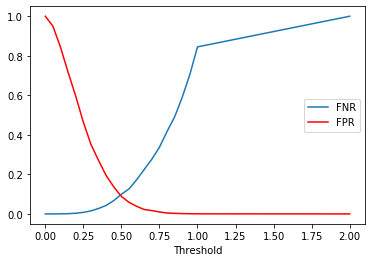

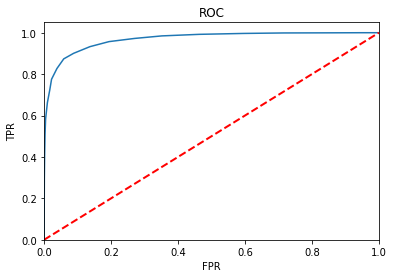



Bot system WORLD
Equal error rate: 0.03845878140331427
ROC AUC score: 0.995024103869642
Accuracy: 0.9637594891339548


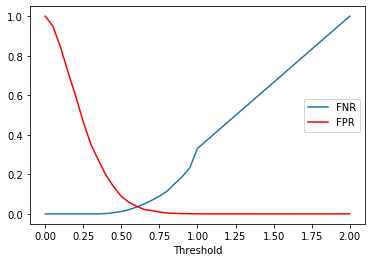

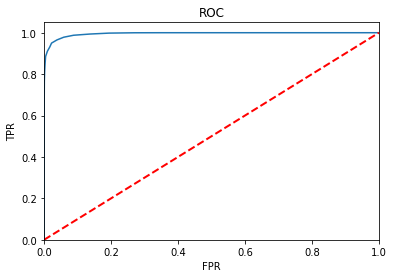



Bot system WORLD
Equal error rate: 0.009959283047338108
ROC AUC score: 0.9993778461572372
Accuracy: 0.9906489801016385


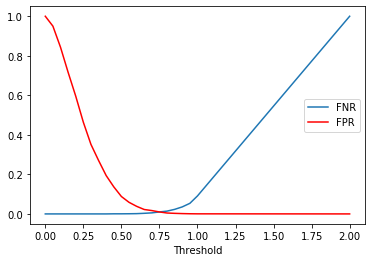

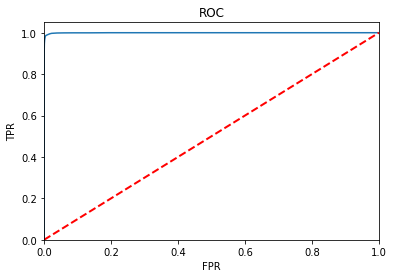



Bot system Waveform concat.
Equal error rate: 0.4637852320386798
ROC AUC score: 0.6169899629263869
Accuracy: 0.5907762229334528


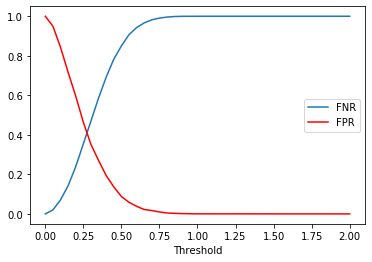

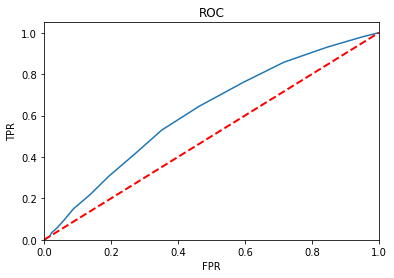



Bot system WORLD
Equal error rate: 0.022399040435213145
ROC AUC score: 0.997560081480879
Accuracy: 0.9791257724286626


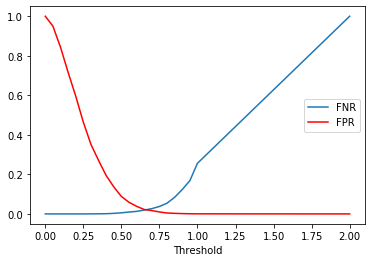

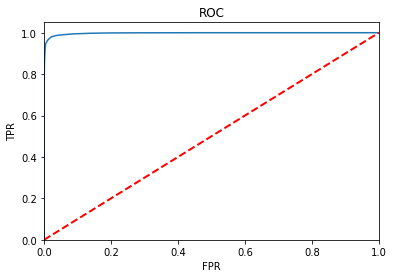



Bot system Spectral filtering + OLA
Equal error rate: 0.35162554350026176
ROC AUC score: 0.7181690270662043
Accuracy: 0.6648200065273777


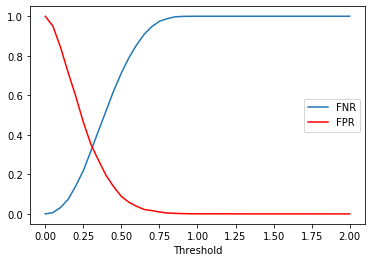

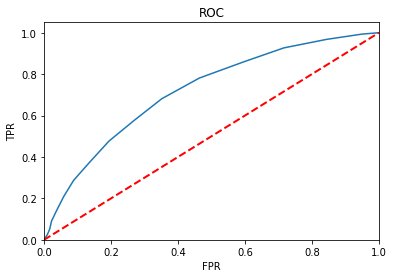

In [38]:
dev_results = []
for b in dev_bot_systems:
    X_dev_spoof = [d['X_dev_spoof'] for d in dev_bot_features if d['bot'] == b][0]
    y_dev_spoof = [d['y_dev_spoof'] for d in dev_bot_features if d['bot'] == b][0]
    
    X_dev = np.concatenate((X_dev_bonafide, X_dev_spoof), axis=0)
    y_dev = np.concatenate((y_dev_bonafide, y_dev_spoof), axis=0)
    
    
    y_dev_hat = clf.predict_proba(X_dev)[:, 1]

    
    print('Bot system %s' %dev_bot_names[b])

    target_score = y_dev_hat[np.where(y_dev==1)]
    nontarget_score = y_dev_hat[np.where(y_dev==0)]

    eer, _ = compute_eer(target_score, nontarget_score)
    print('Equal error rate: {}'.format(eer))
    
    [fpr, tpr, th] = roc_curve(y_dev, y_dev_hat, pos_label=1)
    roc_auc = roc_auc_score(y_dev, y_dev_hat)

    fnr = 1-tpr
    print('ROC AUC score: {}'.format(roc_auc))

    acc = (tpr + (1-fpr)) / 2
    best_th = th[np.where(acc == np.max(acc))][0]
    #print('Best threshold: {}'.format(best_th))
    print('Accuracy: {}'.format(acc.max()))
    
    plt.figure()
    plt.plot(th, fnr)
    plt.plot(th, fpr, color='red')
    plt.xlabel('Threshold')
    plt.legend(['FNR', 'FPR'])
    #plt.plot(th, np.abs(fnr-fpr))
    plt.show()
    
    plt.figure()
    plt.title('ROC')
    plt.plot(fpr, tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.show()
    
    print('\n')

    dev_results.append({'bot': dev_bot_names[b], 'accuracy': acc, 'roc_auc': roc_auc, 'eer':eer})

    

## Train on train and dev, test on eval

### Extract dev features

In [40]:
X_dev_for_train_bonafide_list = []
X_dev_for_train_spoof_list = []

for l in lpc_lengths:
    dev_for_train_features = pd.read_pickle('/nas/home/cborrelli/bot_speech/features/lpc/dev_LPC_' + str(l) +'.pkl')
    #dev_for_train_features.drop('coeff', axis=1, inplace=True)

    dev_for_train_features.dropna(inplace=True)
    
    
    dev_for_train_bonafide_features= dev_for_train_features[dev_for_train_features['label']=='bonafide']
    dev_for_train_spoof_features= dev_for_train_features[dev_for_train_features['label']=='spoof']
    
    if l==1:
        dev_for_train_spoof_features = dev_for_train_features[dev_for_train_features['label']=='spoof'].sample(
            n=dev_for_train_bonafide_features.shape[0])
        selected_files = dev_for_train_spoof_features['audio_filename']
    else:
        dev_for_train_spoof_features = dev_for_train_spoof_features[dev_for_train_spoof_features
                                                                    ['audio_filename'].isin(selected_files)]
    

    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['lpc_res_mean']).reshape((-1, 1)))
    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['lpc_res_max']).reshape((-1, 1)))
    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['lpc_res_min']).reshape((-1, 1)))
    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['lpc_res_var']).reshape((-1, 1)))
    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['lpc_gain_max']).reshape((-1, 1)))
    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['lpc_gain_min']).reshape((-1, 1)))
    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['lpc_gain_mean']).reshape((-1, 1)))
    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['lpc_gain_var']).reshape((-1, 1)))
    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['ltp_res_mean']).reshape((-1, 1)))
    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['ltp_res_max']).reshape((-1, 1)))
    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['ltp_res_min']).reshape((-1, 1)))
    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['ltp_res_var']).reshape((-1, 1)))
    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['ltp_gain_max']).reshape((-1, 1)))
    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['ltp_gain_min']).reshape((-1, 1)))
    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['ltp_gain_mean']).reshape((-1, 1)))
    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['ltp_gain_var']).reshape((-1, 1)))

    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['lpc_res_mean']).reshape((-1, 1)))
    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['lpc_res_max']).reshape((-1, 1)))
    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['lpc_res_min']).reshape((-1, 1)))
    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['lpc_res_var']).reshape((-1, 1)))
    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['lpc_gain_max']).reshape((-1, 1)))
    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['lpc_gain_min']).reshape((-1, 1)))
    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['lpc_gain_mean']).reshape((-1, 1)))
    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['lpc_gain_var']).reshape((-1, 1)))
    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['ltp_res_mean']).reshape((-1, 1)))
    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['ltp_res_max']).reshape((-1, 1)))
    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['ltp_res_min']).reshape((-1, 1)))
    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['ltp_res_var']).reshape((-1, 1)))
    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['ltp_gain_max']).reshape((-1, 1)))
    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['ltp_gain_min']).reshape((-1, 1)))
    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['ltp_gain_mean']).reshape((-1, 1)))
    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['ltp_gain_var']).reshape((-1, 1)))



In [41]:
X_dev_for_train_bonafide = np.concatenate(X_dev_for_train_bonafide_list, axis=1)
X_dev_for_train_spoof = np.concatenate(X_dev_for_train_spoof_list, axis=1)
X_dev_for_train = np.concatenate((X_dev_for_train_bonafide, X_dev_for_train_spoof), axis=0)

y_dev_for_train_bonafide = np.zeros((X_dev_for_train_bonafide.shape[0],))
y_dev_for_train_spoof = np.ones((X_dev_for_train_spoof.shape[0],))

y_dev_for_train = np.concatenate((y_dev_for_train_bonafide, y_dev_for_train_spoof), axis=0)

### Create one dataframe for each bot in eval

dest_folder = '/nas/home/cborrelli/bot_speech/features/lpc/bot'

for l in lpc_lengths:
    eval_features = pd.read_pickle('/nas/home/cborrelli/bot_speech/features/lpc/eval_LPC_' + str(l) +'.pkl')
    #eval_features.drop('coeff', axis=1, inplace=True)
    eval_features.dropna(inplace=True)
    eval_spoof_features= eval_features[eval_features['label']=='spoof']

    for b in bot_systems:
        
        eval_bot_spoof_features = eval_spoof_features[eval_features['system_id'] == b]
        
        dest_filename = 'eval_LPC_'+ str(l)+'_bot_'+str(b)+'.pkl'
        eval_bot_spoof_features.to_pickle(os.path.join(dest_folder, dest_filename))

In [42]:
X_eval_bonafide_list = []

for l in lpc_lengths:
    eval_features = pd.read_pickle('/nas/home/cborrelli/bot_speech/features/lpc/eval_LPC_' + str(l) +'.pkl')
    #eval_features.drop('coeff', axis=1, inplace=True)
    eval_features.dropna(inplace=True)
    
    eval_bonafide_features = eval_features[eval_features['label']=='bonafide']
    
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['lpc_res_mean']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['lpc_res_max']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['lpc_res_min']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['lpc_res_var']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['lpc_gain_max']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['lpc_gain_min']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['lpc_gain_mean']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['lpc_gain_var']).reshape((-1, 1)))
    
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['ltp_res_mean']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['ltp_res_max']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['ltp_res_min']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['ltp_res_var']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['ltp_gain_max']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['ltp_gain_min']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['ltp_gain_mean']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['ltp_gain_var']).reshape((-1, 1)))

    
X_eval_bonafide = np.concatenate(X_eval_bonafide_list, axis=1)
y_eval_bonafide = np.zeros((X_eval_bonafide.shape[0],))

bonafide_length = X_eval_bonafide.shape[0]

In [56]:
X_eval_bonafide_list = []
X_eval_spoof_list = []

eval_bot_systems = ['A11', 'A14', 'A16', 'A09', 'A13', 'A12', 'A18', 'A15', 'A08',
       'A17', 'A10', 'A07', 'A19']
eval_bot_names = {'A11':'Griffin-Lim', 'A14':'STRAIGHT' ,
                          'A16':'Waveform concat.', 'A09':'Vocaine', 
                          'A13':'Waveform filtering', 'A12':'WaveNet*',
                          'A18':'MFCC vocoder', 'A15':'WaveNet*', 
                          'A08':'Neural source-filter*','A17':'Waveform filtering',
                         'A10':'WaveRNN*', 'A07':'WORLD', 'A19': 'Spectral filtering + OLA'}


lpc_lengths = np.arange(1, 51)

eval_bot_features = []

for b in eval_bot_systems:
    X_eval_spoof_list = []
    selected_files = []
    for l in lpc_lengths:
        eval_features = pd.read_pickle('/nas/home/cborrelli/bot_speech/features/lpc/bot/eval_LPC_' + 
                                       str(l) +'_bot_'+ str(b) +'.pkl')
        #eval_features.drop('coeff', axis=1, inplace=True)
        eval_features.dropna(inplace=True)
        
        X_eval_spoof_list.append(np.array(eval_features['lpc_res_mean']).reshape((-1, 1)))
        X_eval_spoof_list.append(np.array(eval_features['lpc_res_max']).reshape((-1, 1)))
        X_eval_spoof_list.append(np.array(eval_features['lpc_res_min']).reshape((-1, 1)))
        X_eval_spoof_list.append(np.array(eval_features['lpc_res_var']).reshape((-1, 1)))
        X_eval_spoof_list.append(np.array(eval_features['lpc_gain_max']).reshape((-1, 1)))
        X_eval_spoof_list.append(np.array(eval_features['lpc_gain_min']).reshape((-1, 1)))
        X_eval_spoof_list.append(np.array(eval_features['lpc_gain_mean']).reshape((-1, 1)))
        X_eval_spoof_list.append(np.array(eval_features['lpc_gain_var']).reshape((-1, 1)))
        X_eval_spoof_list.append(np.array(eval_features['ltp_res_mean']).reshape((-1, 1)))
        X_eval_spoof_list.append(np.array(eval_features['ltp_res_max']).reshape((-1, 1)))
        X_eval_spoof_list.append(np.array(eval_features['ltp_res_min']).reshape((-1, 1)))
        X_eval_spoof_list.append(np.array(eval_features['ltp_res_var']).reshape((-1, 1)))
        X_eval_spoof_list.append(np.array(eval_features['ltp_gain_max']).reshape((-1, 1)))
        X_eval_spoof_list.append(np.array(eval_features['ltp_gain_min']).reshape((-1, 1)))
        X_eval_spoof_list.append(np.array(eval_features['ltp_gain_mean']).reshape((-1, 1)))
        X_eval_spoof_list.append(np.array(eval_features['ltp_gain_var']).reshape((-1, 1)))

    X_eval_spoof = np.concatenate(X_eval_spoof_list, axis=1)
    y_eval_spoof = np.ones((X_eval_spoof.shape[0],))

    eval_bot_features.append({'bot': b, 'X_eval_spoof': X_eval_spoof, 'y_eval_spoof': y_eval_spoof})

### Train on both train and dev, test on eval

In [57]:
X_bonafide = np.concatenate((X_train_bonafide, X_dev_for_train_bonafide), axis=0)
X_spoof = np.concatenate((X_train_spoof, X_dev_for_train_spoof), axis=0)
                
X = np.concatenate((X_bonafide, X_spoof), axis=0)

In [58]:
y_bonafide = np.zeros([X_bonafide.shape[0],])
y_spoof = np.ones([X_spoof.shape[0],])

y = np.concatenate((y_bonafide, y_spoof), axis=0)


In [59]:
clf2 = RandomForestClassifier(n_estimators=20, class_weight='balanced')
clf2.fit(X, y)  

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
y_eval

array([0., 0., 0., ..., 0., 0., 0.])

Bot system Griffin-Lim
ROC AUC score: 0.7181690270662043
Equal error rate: 0.25299224129804926
Accuracy: 0.7522467894812566


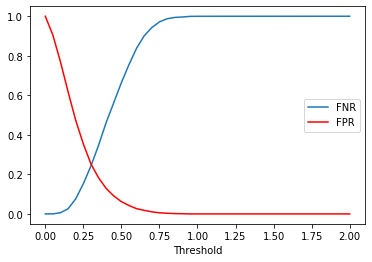

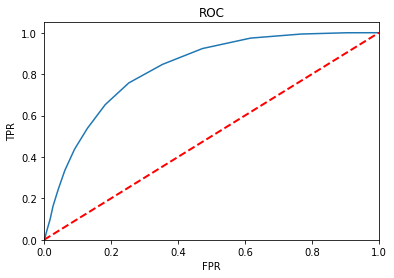



Bot system STRAIGHT
ROC AUC score: 0.7181690270662043
Equal error rate: 0.06874741948802643
Accuracy: 0.9345196259665189


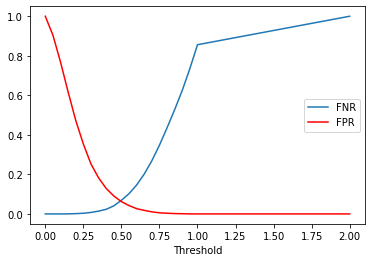

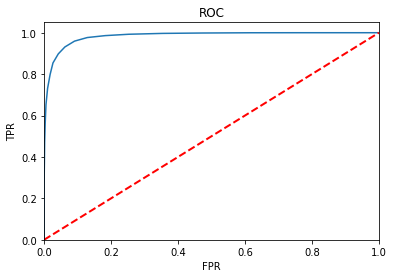



Bot system Waveform concat.
ROC AUC score: 0.7181690270662043
Equal error rate: 0.36778588688610236
Accuracy: 0.6391743403866249


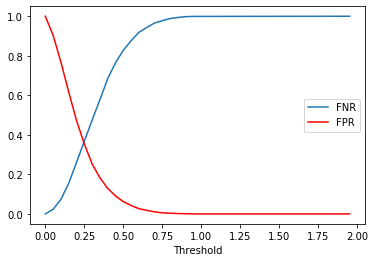

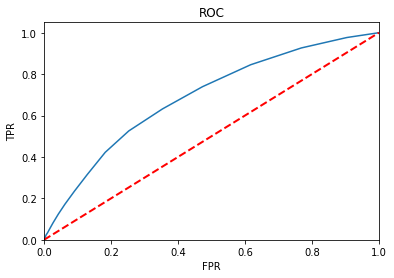



Bot system Vocaine
ROC AUC score: 0.7181690270662043
Equal error rate: 0.1289910764230465
Accuracy: 0.8805569821383794


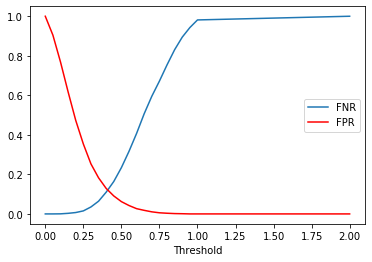

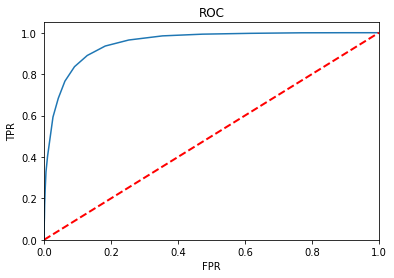



Bot system Waveform filtering
ROC AUC score: 0.7181690270662043
Equal error rate: 0.11433879239817235
Accuracy: 0.9053874042953876


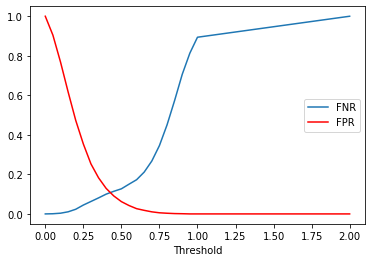

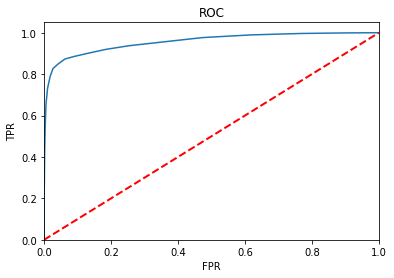



Bot system WaveNet*
ROC AUC score: 0.7181690270662043
Equal error rate: 0.4731288756407235
Accuracy: 0.5446935482089201


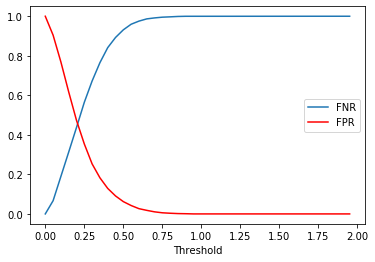

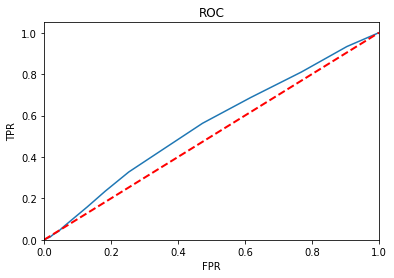



Bot system MFCC vocoder
ROC AUC score: 0.7181690270662043
Equal error rate: 0.12899098578695972
Accuracy: 0.8820085870451633


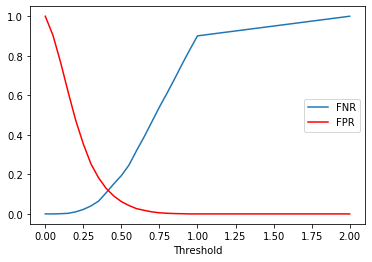

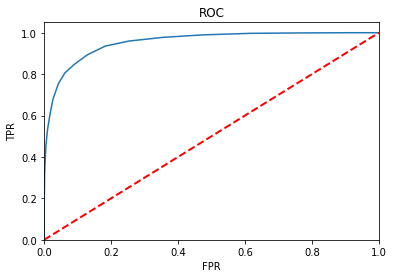



Bot system WaveNet*
ROC AUC score: 0.7181690270662043
Equal error rate: 0.5685953240251655
Accuracy: 0.5


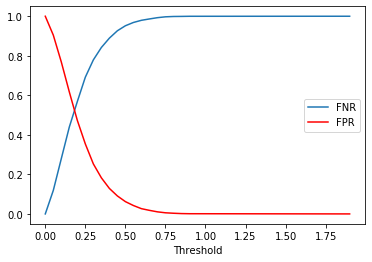

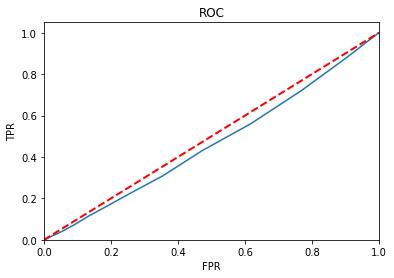



Bot system Neural source-filter*
ROC AUC score: 0.7181690270662043
Equal error rate: 0.0918923418217531
Accuracy: 0.912268238363557


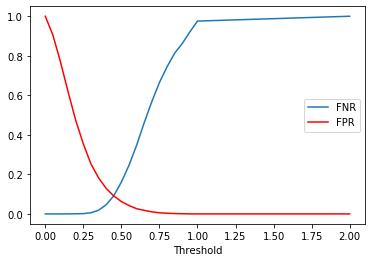

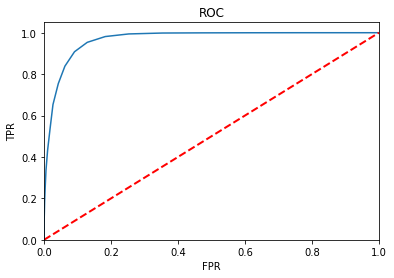



Bot system Waveform filtering
ROC AUC score: 0.7181690270662043
Equal error rate: 0.31261073047822574
Accuracy: 0.7212441882291787


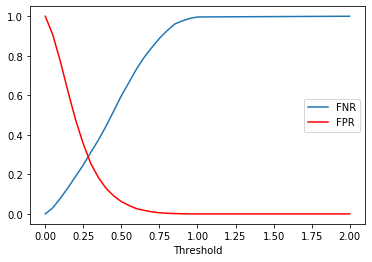

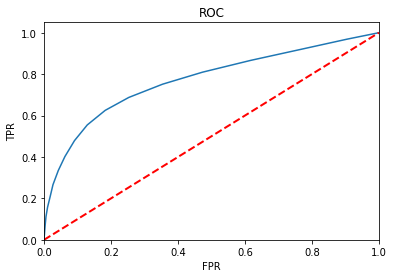



Bot system WaveRNN*
ROC AUC score: 0.7181690270662043
Equal error rate: 0.5373834575199133
Accuracy: 0.5005799693023816


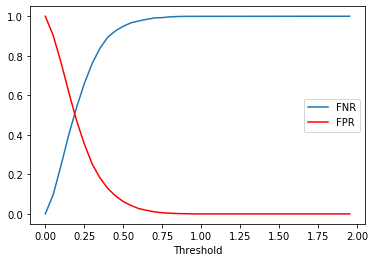

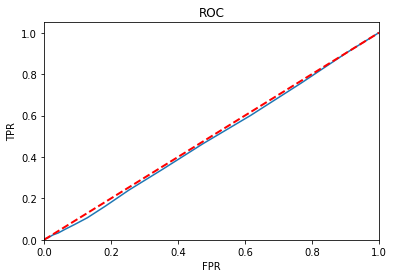



Bot system WORLD
ROC AUC score: 0.7181690270662043
Equal error rate: 0.4340612178795077
Accuracy: 0.6068696353379399


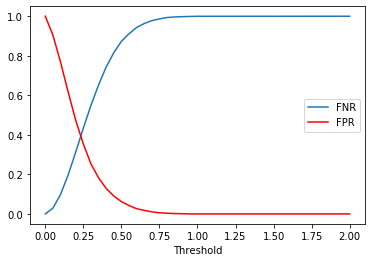

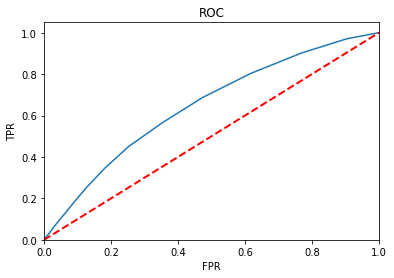



Bot system Spectral filtering + OLA
ROC AUC score: 0.7181690270662043
Equal error rate: 0.3538779846313046
Accuracy: 0.6773193172236701


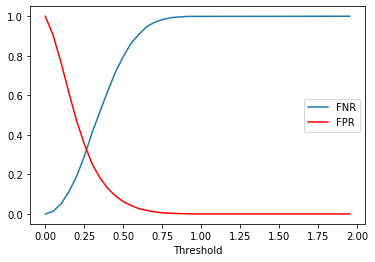

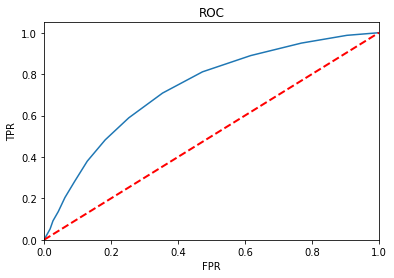

In [62]:
eval_results = []

for b in eval_bot_systems:
    X_eval_spoof = [d['X_eval_spoof'] for d in eval_bot_features if d['bot'] == b][0]
    y_eval_spoof = [d['y_eval_spoof'] for d in eval_bot_features if d['bot'] == b][0]
    
    X_eval = np.concatenate((X_eval_bonafide, X_eval_spoof), axis=0)
    y_eval = np.concatenate((y_eval_bonafide, y_eval_spoof), axis=0)
    
    
    y_eval_hat = clf2.predict_proba(X_eval)[:, 1]

    print('Bot system %s' %eval_bot_names[b])

    print('ROC AUC score: {}'.format(roc_auc))
    
    target_score = y_eval_hat[np.where(y_eval==1)]
    nontarget_score = y_eval_hat[np.where(y_eval==0)]
    
    eer, _ = compute_eer(target_score, nontarget_score)
    print('Equal error rate: {}'.format(eer))
    
    
    [fpr, tpr, th] = roc_curve(y_eval, y_eval_hat, pos_label=1)
    fnr = 1-tpr
    
    acc = (tpr + (1-fpr)) / 2
    best_th = th[np.where(acc == np.max(acc))]
    #print('Best threshold: {}'.format(best_th))
    print('Accuracy: {}'.format(acc.max()))
    
    
    plt.figure()
    plt.plot(th, fnr)
    plt.plot(th, fpr, color='red')
    plt.xlabel('Threshold')
    plt.legend(['FNR', 'FPR'])
    #plt.plot(th, np.abs(fnr-fpr))
    plt.show()
    
    plt.figure()
    plt.title('ROC')
    plt.plot(fpr, tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.show()
    
    print('\n')

    results.append({'bot': eval_bot_names[b], 'accuracy': acc, 'roc_auc': roc_auc, 'eer':eer})



In [50]:
th

array([1.95, 0.95, 0.9 , 0.85, 0.8 , 0.75, 0.7 , 0.65, 0.6 , 0.55, 0.5 ,
       0.45, 0.4 , 0.35, 0.3 , 0.25, 0.2 , 0.15, 0.1 , 0.05, 0.  ])